### Notebook Dedicated to transposing the 2017 Data to Reflect Current market

In [41]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [72]:
# read in the CC data
CC = pd.read_csv('../Data/CC_cleaned.csv')

# print head
print(CC.head())



    ZIP  SOLDPRICE  SQFT  BEDS  BATHS  AGE  DOM      lat     long  zip_cluster
0  2474   410000.0  1368     2    2.0    3  897  42.4202 -71.1565       2474.0
1  2124   327000.0  1850     2    2.5    5  658  42.2918 -71.0717       2124.0
2  2184   331000.0  1469     2    1.0   38  467  42.2093 -70.9963       2184.0
3  1949   580000.0  2945     2    2.5    4  565  42.5942 -71.0130       1949.0
4  2139  1000000.0  2536     3    2.5    3   56  42.3647 -71.1042       2139.0


In [68]:
# bringing in the ZHVI dataset
ZHVI = pd.read_csv("../Data/zillow/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")



# print head
print(ZHVI.head())

# filter to just the the zips in the CC data
ZHVI = ZHVI[ZHVI['RegionName'].isin(CC['ZIP'])]

# print head
print(ZHVI.head())







   RegionID  SizeRank  RegionName RegionType StateName State      City  \
0     91982         1       77494        zip        TX    TX      Katy   
1     61148         2        8701        zip        NJ    NJ  Lakewood   
2     91940         3       77449        zip        TX    TX      Katy   
3     62080         4       11368        zip        NY    NY  New York   
4     91733         5       77084        zip        TX    TX   Houston   

                                   Metro        CountyName     2000-01-31  \
0   Houston-The Woodlands-Sugar Land, TX  Fort Bend County  212757.568407   
1  New York-Newark-Jersey City, NY-NJ-PA      Ocean County  139171.687163   
2   Houston-The Woodlands-Sugar Land, TX     Harris County  103736.197118   
3  New York-Newark-Jersey City, NY-NJ-PA     Queens County  147341.057200   
4   Houston-The Woodlands-Sugar Land, TX     Harris County  102296.421002   

   ...     2023-11-30     2023-12-31     2024-01-31     2024-02-29  \
0  ...  492924.222260 

In [69]:

# show all rows of ZHVI whose RegionName is in the CC dataset
#print(ZHVI[ZHVI['RegionName'].isin(CC['ZIP'])])

# subset the ZHVI to these rows
ZHVI_subset = ZHVI[ZHVI['RegionName'].isin(CC['ZIP'])]

# print number of rows
print(ZHVI_subset.shape[0])



349


In [35]:
# print zips in CC that are not in ZHVI_subset
print(CC[~CC['ZIP'].isin(ZHVI_subset['RegionName'])])



        ZIP  SOLDPRICE  SQFT  BEDS  BATHS  AGE  DOM      lat     long  \
141    1864   135000.0  1183     2    2.0    2   16  42.5819 -71.0947   
667    1864   180000.0   844     1    1.0  118   55  42.5819 -71.0947   
777    1864   422000.0  1092     2    1.5   39   61  42.5819 -71.0947   
945    1864   575000.0  1194     2    1.0   98   19  42.5819 -71.0947   
1550   1864   605000.0  1517     3    1.5   34   11  42.5819 -71.0947   
1680   1864   151750.0  1875     3    2.5    7   50  42.5819 -71.0947   
1901   2625   203000.0  2261     2    2.5   12   26      NaN      NaN   
1944   1864   287500.0  1729     2    2.5   18   48  42.5819 -71.0947   
2176   2558   234000.0  2050     3    2.5   16    3  41.7476 -70.6582   
2315   1864   229000.0  5456     4    3.0   17   62  42.5819 -71.0947   
2358   1864   419900.0   630     1    1.0  128   13  42.5819 -71.0947   
2397   2031   130500.0  1503     2    2.5    2  103      NaN      NaN   
2725   1815   174900.0  1742     3    2.0  118   75

Handle the values that are not in the ZHVI by transposing them according to the mean of MA

464793.44278930797
731170.8693286368


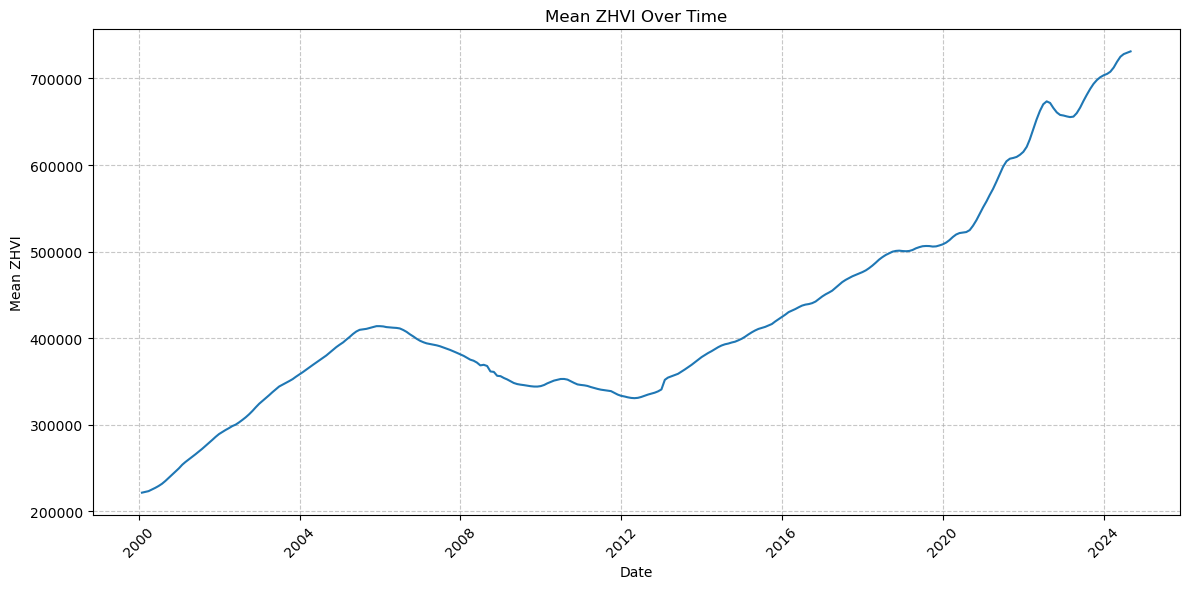

In [46]:
# get the mean of the ZHVI for MA in 2017-06-30
ZHVI_mean = ZHVI_subset['2017-06-30'].mean()

# get the mean of the most recent ZHVI column 
ZHVI_recent = ZHVI_subset.iloc[:, -1].mean()

# print the mean
print(ZHVI_mean)

# print the most recent ZHVI
print(ZHVI_recent)

# plot the mean over time for the columns that are dates
date_columns = ZHVI_subset.columns[6:]
# Convert only the date columns to datetime, excluding non-date columns
date_columns = pd.to_datetime(date_columns[date_columns.str.match(r'\d{4}-\d{2}-\d{2}')])
plt.figure(figsize=(12, 6))
plt.plot(date_columns, ZHVI_subset.loc[:, date_columns.astype(str)].mean())
plt.xlabel('Date')
plt.ylabel('Mean ZHVI')
plt.title('Mean ZHVI Over Time')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [70]:
# only show the columns 'RegionName', '2017-06-30', and last column
ZHVI_subset = ZHVI_subset[['RegionName', '2017-06-30', ZHVI_subset.columns[-1]]]

# get the percent change from '2017-06-30' to '2024-08-31', which should be a multiplier (above 1 if the market has appreciated, below 1 if the market has depreciated)
ZHVI_subset['Percent Change'] = (ZHVI_subset['2024-08-31']) / ZHVI_subset['2017-06-30']


# print head
print(ZHVI_subset.head(25))

# get the mean of the percent change
ZHVI_percent_change = ZHVI_subset['Percent Change'].mean()

# print the mean
print(ZHVI_percent_change)


# print head
#print(CC.head())





      RegionName     2017-06-30     2024-08-31  Percent Change
242         2301  274531.552606  494294.916205        1.800503
307         2148  408701.209859  645773.214746        1.580062
419         2155  540549.952894  801733.186576        1.483181
457         2151  377280.102767  596564.894546        1.581225
537         2169  398278.013256  613047.893286        1.539246
571         2124  437651.379997  649139.580470        1.483234
721         1960  414580.049459  672616.953940        1.622406
762         2360  364799.735951  613534.640479        1.681840
806         2780  280948.188174  487754.583932        1.736102
810         1844  335665.908589  576971.959190        1.718888
837         1841  215197.827383  441217.706265        2.050289
1023        2860  182150.363315  366870.039597        2.014105
1068        2149  371014.872703  601081.646267        1.620101
1076        1902  280583.466542  508594.907514        1.812633
1232        2740  208660.147075  401667.163510        1

In [73]:
# add a multiplier change_to_now column to the CC dataset based on the zip code, with a default value of the mean of the ZHVI_percent_change
# this should be above 1 if the market has appreciated, and below 1 if the market has depreciated
CC['sold_price_multiplier'] = CC['ZIP'].apply(lambda x: ZHVI_subset[ZHVI_subset['RegionName'] == x]['Percent Change'].iloc[0] if not ZHVI_subset[ZHVI_subset['RegionName'] == x].empty else ZHVI_percent_change)

# print head
print(CC.head())





    ZIP  SOLDPRICE  SQFT  BEDS  BATHS  AGE  DOM      lat     long  \
0  2474   410000.0  1368     2    2.0    3  897  42.4202 -71.1565   
1  2124   327000.0  1850     2    2.5    5  658  42.2918 -71.0717   
2  2184   331000.0  1469     2    1.0   38  467  42.2093 -70.9963   
3  1949   580000.0  2945     2    2.5    4  565  42.5942 -71.0130   
4  2139  1000000.0  2536     3    2.5    3   56  42.3647 -71.1042   

   zip_cluster  percent_change_to_now  
0       2474.0               1.514005  
1       2124.0               1.483234  
2       2184.0               1.493846  
3       1949.0               1.569716  
4       2139.0               1.290627  


In [75]:
# create actualized_price column by multiplying the price by the percent_change_to_now
CC['actualized_price'] = CC['SOLDPRICE'] * CC['sold_price_multiplier']

# print head
print(CC.head())






    ZIP  SOLDPRICE  SQFT  BEDS  BATHS  AGE  DOM      lat     long  \
0  2474   410000.0  1368     2    2.0    3  897  42.4202 -71.1565   
1  2124   327000.0  1850     2    2.5    5  658  42.2918 -71.0717   
2  2184   331000.0  1469     2    1.0   38  467  42.2093 -70.9963   
3  1949   580000.0  2945     2    2.5    4  565  42.5942 -71.0130   
4  2139  1000000.0  2536     3    2.5    3   56  42.3647 -71.1042   

   zip_cluster  percent_change_to_now  actualized_price  
0       2474.0               1.514005      6.207420e+05  
1       2124.0               1.483234      4.850176e+05  
2       2184.0               1.493846      4.944630e+05  
3       1949.0               1.569716      9.104350e+05  
4       2139.0               1.290627      1.290627e+06  


## Now Same process with DOM

   RegionID  SizeRank       RegionName RegionType StateName  2018-03-31  \
0    102001         0    United States    country       NaN        51.0   
1    394913         1     New York, NY        msa        NY        68.0   
2    753899         2  Los Angeles, CA        msa        CA        35.0   
3    394463         3      Chicago, IL        msa        IL        51.0   
4    394514         4       Dallas, TX        msa        TX        46.0   

   2018-04-30  2018-05-31  2018-06-30  2018-07-31  ...  2023-11-30  \
0        48.0        45.0        43.0        44.0  ...        39.0   
1        65.0        63.0        64.0        66.0  ...        57.0   
2        32.0        31.0        32.0        33.0  ...        33.0   
3        44.0        40.0        39.0        40.0  ...        30.0   
4        42.0        38.0        37.0        38.0  ...        40.0   

   2023-12-31  2024-01-31  2024-02-29  2024-03-31  2024-04-30  2024-05-31  \
0        44.0        49.0        52.0        49.0  

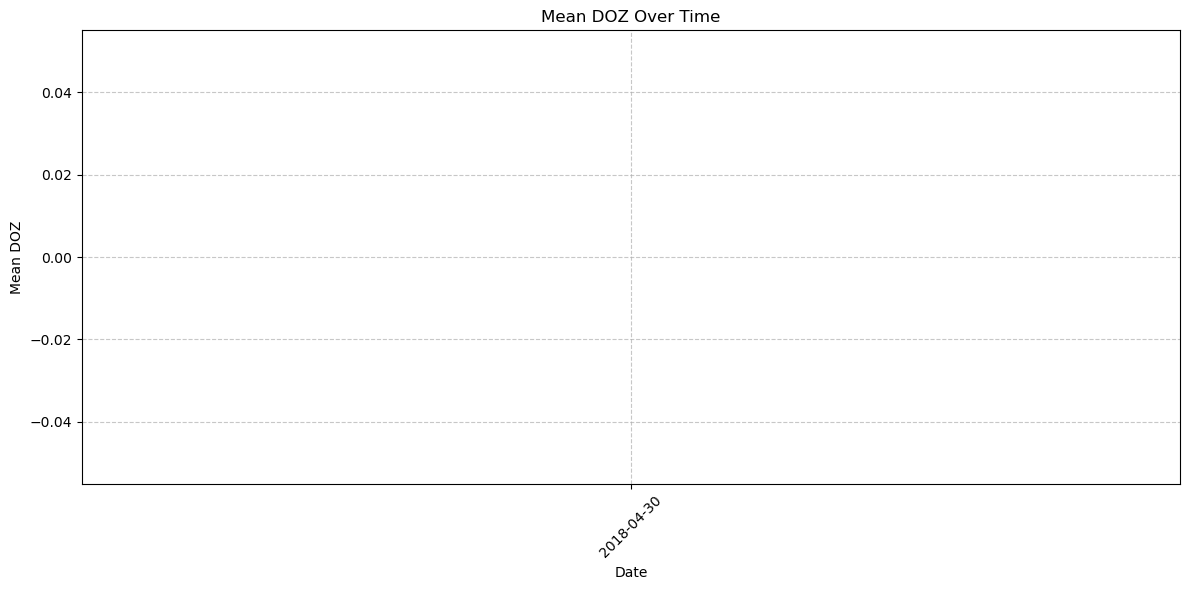

In [77]:
# # get the mean of the ZHVI for MA in 2017-06-30
# ZHVI_mean = ZHVI_subset['2017-06-30'].mean()

# # get the mean of the most recent ZHVI column 
# ZHVI_recent = ZHVI_subset.iloc[:, -1].mean()

# # print the mean
# print(ZHVI_mean)

# # print the most recent ZHVI
# print(ZHVI_recent)

# # plot the mean over time for the columns that are dates
# date_columns = ZHVI_subset.columns[6:]
# # Convert only the date columns to datetime, excluding non-date columns
# date_columns = pd.to_datetime(date_columns[date_columns.str.match(r'\d{4}-\d{2}-\d{2}')])
# plt.figure(figsize=(12, 6))
# plt.plot(date_columns, ZHVI_subset.loc[:, date_columns.astype(str)].mean())
# plt.xlabel('Date')
# plt.ylabel('Mean ZHVI')
# plt.title('Mean ZHVI Over Time')
# plt.xticks(rotation=45)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

# plot the mean of the DOZ for each month
plt.figure(figsize=(12, 6))
plt.plot(DOZ.columns[6:], DOZ.iloc[:, 6:].mean())
plt.xlabel('Date')
plt.ylabel('Mean DOZ')
plt.title('Mean DOZ Over Time')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

